#Q1


## PyMC Example Gallery

- [1. General Overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html)
- [2. Simple Linear Regression](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/GLM_linear.html)
- [3. General API Quickstart](https://www.pymc.io/projects/examples/en/latest/introductory/api_quickstart.html)
- [4. Bayesian Missing Data Imputation](https://www.pymc.io/projects/examples/en/latest/howto/Missing_Data_Imputation.html)
- [5. Updating Priors](https://www.pymc.io/projects/examples/en/latest/howto/updating_priors.html)
- [6. How to debug a model](https://www.pymc.io/projects/examples/en/latest/howto/howto_debugging.html)
- [7. LKJ Cholesky Covariance Priors for Multivariate Normal Models](https://www.pymc.io/projects/examples/en/latest/howto/LKJ.html)
- [8. Distribution Dimensionality](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/dimensionality.html#dimensionality)
- [9. Using ModelBuilder class for deploying PyMC models](https://www.pymc.io/projects/examples/en/latest/howto/model_builder.html)
- [10. Bayesian copula estimation: Describing correlated joint distributions](https://www.pymc.io/projects/examples/en/latest/howto/copula-estimation.html)
- [11. GLM-missing-values-in-covariates](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/GLM-missing-values-in-covariates.html)
- [12. Lasso regression with block updating](https://www.pymc.io/projects/examples/en/latest/samplers/lasso_block_update.html)

   
|![](https://www.pymc.io/projects/docs/en/stable/_images/ebec467a18d6db85f2aabb7744c245f639e4dec07375a166c72f6fdb1d36a406.png)| Image 1 from General Overview |
|![](https://www.pymc.io/projects/docs/en/stable/_images/ad02eabf1d3154d899455a5078259474f2133ba633129b2cb25c831284723dc7.png)| Image 2 from Simple Linear Regression |
|![](https://www.pymc.io/projects/examples/en/latest/_images/39efd09b12953741f958e0a4e30c960050d4f5134413a47538ee821e2f1d7766.png)| Image 3 from General API Quickstart |
|![](https://www.pymc.io/projects/examples/en/latest/_images/c9989dd8511d1b594a2a82b778f8eea3617da7df1135c6bd3dd174a50acb4e2e.png)| Image 4 from Bayesian Missing Data Imputation |
|![](https://www.pymc.io/projects/examples/en/latest/_images/5c91b2b45e4e07be744bd90c92793f4b064b85ea9e147b0eaf3b463e1735f34a.png)| Image 5 from Updating Priorsw |
|![](https://www.pymc.io/projects/examples/en/latest/_images/cd8d49dd3519e25c0ec2d3ef30a0816fe9c3f7708d9eda15d157590da6ca27b5.svg)| Image 6 from How to debug a model |
|![](https://www.pymc.io/projects/examples/en/latest/_images/f859e4ca959a1c0fc8f886a6752ef8317cff5016e94dc17a7c1cc6ac2cd9535f.png)| Image 7 from LKJ Cholesky Covariance Priors for Multivariate Normal Models |
|![](https://www.pymc.io/projects/docs/en/stable/_images/73352774c2286019a31b211a29ee527bace6cc46ab421aa3e4c3f572a6658da5.svg)| Image 8 from Distribution Dimensionality |
|![](https://www.pymc.io/projects/examples/en/latest/_images/bbc4da85106ec9c236813f170272c9b249e0a8af0911c428cddbf54bb0752c74.png)| Image 9 from Using ModelBuilder class for deploying PyMC models |
|![](https://www.pymc.io/projects/examples/en/latest/_images/copula_schematic.png)| Image 10 from Bayesian copula estimation: Describing correlated joint distributions |
|![](https://www.pymc.io/projects/examples/en/latest/_images/39b62e02913b56f54c4c218aca75b41ef2510bb5a77d80c74a436d545d569b9b.png)| Image 11 from GLM-missing-values-in-covariates |
|![](https://www.pymc.io/projects/examples/en/latest/_images/2bc755fd8bf0a29be0c099502d53d2097de89708e8fd4c792426392f28773e1f.png)| Image 12 from Lasso regression with block updating |
    
| | | |
|-|-|-|
|1|2|3|4|
|5|6|7|8|
|9|10|11|12|
"""



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mean_param, precision_param]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


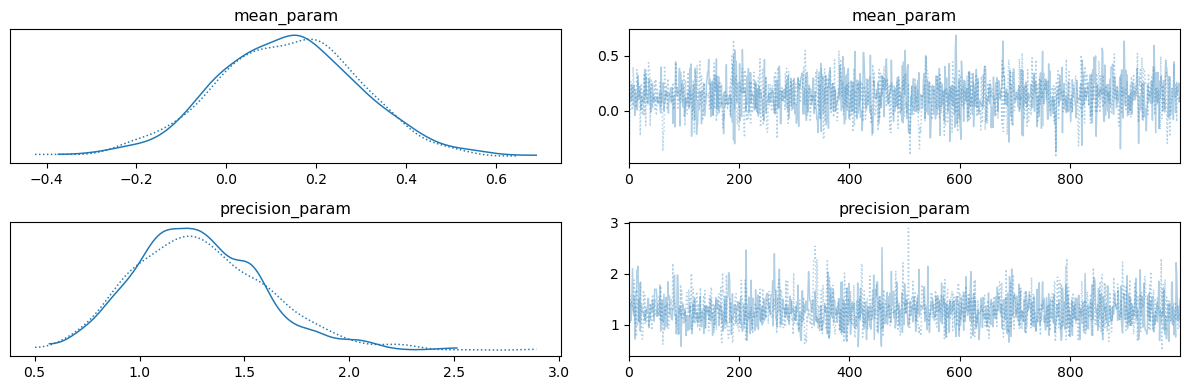

In [5]:
#Q2

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc as pm
import arviz as az

n = 30
s = 0.2
x = stats.norm(loc=0, scale=1).rvs(size=n)

#Gamma prior 
with pm.Model() as model1:
    mean_param = pm.Normal('mean_param', mu=0, sigma=1)
    precision_param = pm.Gamma('precision_param', alpha=2, beta=1)
    
    observed_data = pm.Normal('observed_data', mu=mean_param, tau=precision_param, observed=x)
    trace1 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(trace1)
plt.tight_layout()



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mean_param, precision_param]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


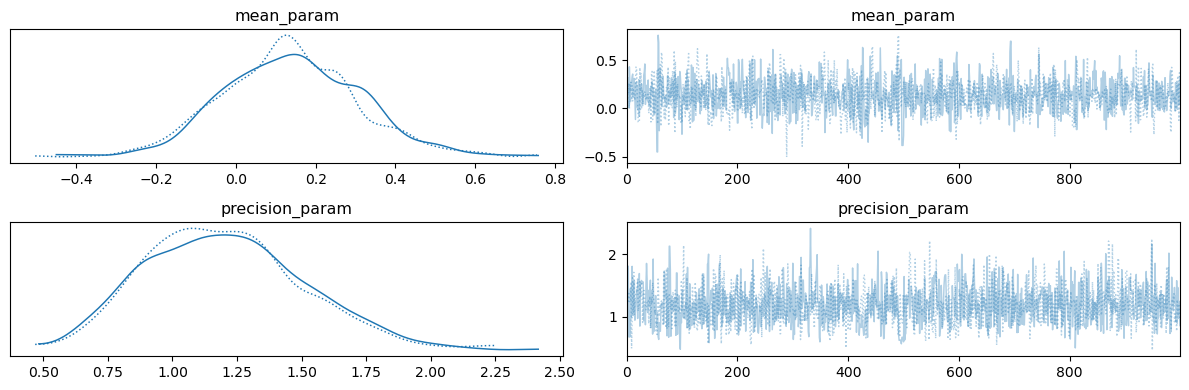

In [6]:
#Non-Gamma prior 
with pm.Model() as model2:
    mean_param = pm.Uniform('mean_param', lower=-5, upper=5)
    precision_param = pm.Exponential('precision_param', lam=1)
    
    observed_data = pm.Normal('observed_data', mu=mean_param, tau=precision_param, observed=x)
    
    trace2 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(trace2)
plt.tight_layout()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [mean_param, precision_param]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


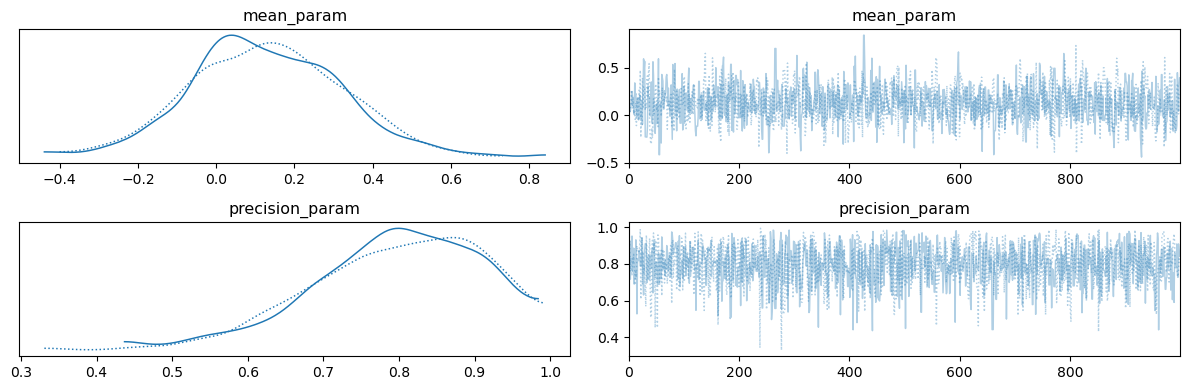

In [7]:
#Another set of non-Normal and non-Gamma priors
with pm.Model() as model3:
    mean_param = pm.Laplace('mean_param', mu=0, b=1)
    precision_param = pm.Beta('precision_param', alpha=2, beta=2)
    
    observed_data = pm.Normal('observed_data', mu=mean_param, tau=precision_param, observed=x)
    
    trace3 = pm.sample(1000, chains=2, return_inferencedata=True)

az.plot_trace(trace3)
plt.tight_layout()


#Q3

1. Markov algorithm

Slice Sampling is a Markov Chain Monte Carlo (MCMC) method that is mainly used to sample from complex distributions, especially when the normalising constant is unknown. This method requires us to introduce a secondary variable and sample uniformly from the region below the probability density function. To implement it, we need to first define a target function f(x), which is the probability density function we want to sample from. Then, we start with an initial point x. Next, perform vertical sampling by drawing a vertical coordinate uniformly from the interval between 0 and the value of the target function at the current point, which defines a horizontal slice under the function. Following this, sample a new point uniformly within the horizontal interval where the target function is greater than the vertical sample. If the new point is valid, meaning it satisfies the condition, it is accepted as the new sample. If not, the interval is shrunk, and the process is repeated until a valid sample is found. In the code below, the function slice_f_at_y(f, x, y, x_grid) implements the slice sampling part. They iteratively shrink the interval through the helper function slice_f_at_y_ until they find a suitable x.

2.Slice sampling could be used in place of a Metropolis-Hasting

In the context of Gibbs sampling, when the full conditional distributions are only known up to a normalizing constant, slice sampling can be a powerful alternative to the Metropolis-Hastings method. Instead of proposing a new state and accepting or rejecting it, as in Metropolis-Hastings, slice sampling directly samples from the slice defined by the current state. In Gibbs sampling, when using slice sampling instead of Metropolis-Hastings, the process starts by first sampling a vertical coordinate y uniformly from the interval [0, f(x_current)], where f(x_c​urrent) represents the unnormalized full conditional density of the current variable. Next, the slice is defined by identifying the interval where f(x)>y. Then, a new state is sampled uniformly from this slice. Finally, this process is repeated for each variable in the Gibbs cycle, with the current state of the Markov chain serving as the starting point for each iteration. This approach eliminates the need for proposing and accepting/rejecting new states as done in Metropolis-Hastings.

3. Curve and initial value

The curve we're sampling from the code below is defined by the probability density function (PDF) f(x). The code f = lambda x: stats.beta(1.5, 3).pdf(x) uses a Beta distribution with parameters 1.5 and 3 as the target function f(x). The initial Values x in the Gibbs sampling process, you initialize each variable with some starting value. In your code, the variable x is initialized as x[:2,0] = 0.25. The step is first draw uniformly below f(x) at each iteration , sample a new value for x using slice sampling (implemented by the function slice_f_at_y). In the Gibbs sampling framework, we would conditionally update each variable based on the others. Here, the algorithm iteratively updates the value of x[t+1,0] using the slice sampling method, which does not require knowledge of the normalizing constant and often provides better mixing for complex target distributions.




In [ ]:
def slice_f_at_y(f, x, y, x_grid=np.linspace(0,1,51)):
    
    # find interval of grid points where f(x_grid) > y 
    # then extend the enterval so endpoints f(a)<y and f(b)<y 
    x_grid_delta = x_grid[1]-x_grid[0]
    a,b = x_grid[f(x_grid)>y][[0,-1]]+[-x_grid_delta,x_grid_delta]
    # a,b = x_grid[0,-1]  # make the interval all of x_grid
    
    x_ = a + stats.uniform().rvs()*(b-a)    
    if f(x_)>y:
        return x_,1  # in 1 try if f(x_)>y and "x_ is under f" 
    elif x_ < x:  # or if "x_ was above f on the left side of the interval" 
        x_l,x_r = x_,b
    else:
        x_l,x_r = a,x_  # or if "x_ was above f on the right side of the interval"
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = 2)  # try again with a reduced interval

def slice_f_at_y_(f, x, y, x_l=0, x_r=1, tot=1):
    
    x_ = x_l + stats.uniform().rvs()*(x_r-x_l)
    
    if f(x_)>y:
        return x_,tot
    elif x_ < x:
        x_l = x_
    else:
        x_r = x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = tot+1)

In [ ]:
x_grid = np.linspace(0,1,1000)
f = lambda x: stats.beta(1.5,3).pdf(x)
plt.plot(x_grid, f(x_grid))
    
m = 1000
x = np.zeros([m+1,3])
x[:2,0] = 0.25

plot_trace = 10
for t in range(1,m):
    
    x[t,1] = stats.uniform().rvs()*f(x[t,0])
    if t < plot_trace:
        plt.plot([x[t,0]]*2, [x[t-1,1],x[t,1]], 'k')
    
    x[t+1,0],x[t+1,2] = slice_f_at_y(f, x[t,0], x[t,1])
    if t < plot_trace:
        if t==1:
            plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--', label=str(plot_trace)+ " iterations")
        plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--')
    
plt.hist(x[:,0], density=True, label=str(m)+" iterations\n x values only")
plt.legend();